In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import matplotlib.colors as mcolors
import numpy as np
import collections
import seaborn as sns
from pygam import LogisticGAM
import matplotlib.tri as tri
from scipy.interpolate import griddata

In [3]:
data = pd.read_csv('pitch_data_2008_2021')
pitch_data = data[['pitch_name', 'plate_x', 'plate_z', 'description', 'stand']]
pitch_data = pitch_data[pitch_data['description'].isin(['called_strike', 'ball', 'blocked_ball'])]
pitch_data['description'].replace('blocked_ball', 'ball', inplace = True)

def true_strikezone(data):
    classifier_data = data[['description', 'plate_x', 'plate_z']]
    X = classifier_data[['plate_x', 'plate_z']]
    y = classifier_data['description']
    classifier_data['description'].replace('ball', 0, inplace = True)
    classifier_data['description'].replace('called_strike', 1, inplace = True)
    gam = LogisticGAM().fit(X, y)
    classifier_data['pred'] = gam.predict(X)
    classifier_data['pred'].replace(False, 'ball', inplace = True)
    classifier_data['pred'].replace(True, 'strike', inplace = True)
    
    fig, ax = plt.subplots(figsize =(10,10))

    # Outer Zone (To gage length from strikezone)

    plt.plot([-2,-2],[0,5], color="black")     
    plt.plot([2,2],[0,5], color="black")
    plt.plot([-2,2],[0,0], color="black")
    plt.plot([-2,2],[5,5], color="black")

    #Strikezone

    plt.plot([-.725,-.725],[1.5,3.5], color="black")  #left line
    plt.plot([.725,.725],[1.5,3.5], color="black")   #right line
    plt.plot([-.725,.725],[1.5,1.5], color="black")  #bottom line
    plt.plot([-.725,.725],[3.5,3.5], color="black")  #top line

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

    palette ={"ball": "green", "strike": "red"}    #differentiating balls and strikes

    ax = sns.scatterplot(data= classifier_data, x='plate_x', y='plate_z', hue = 'pred', s = 7, palette = palette)
    ax.set_title('Fastball')

    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,24,44,88,89,93) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

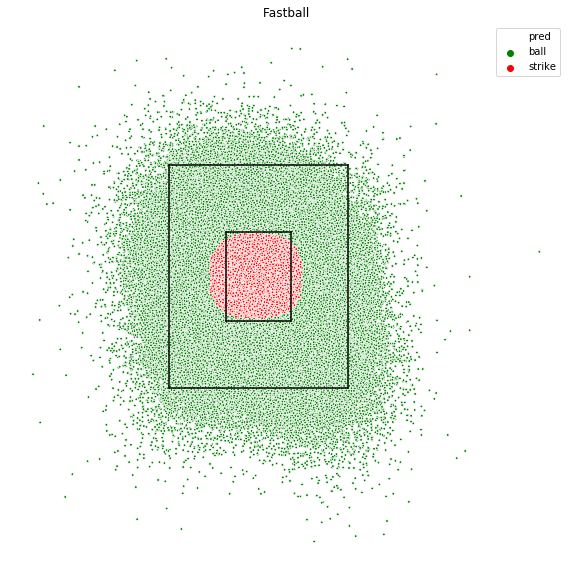

In [8]:
#replace pitch_data with your data
true_strikezone(pitch_data)

In [71]:
def contour_plot(data):

    classifier_data = data[['description', 'plate_x', 'plate_z']]
    X = classifier_data[['plate_x', 'plate_z']]
    y = classifier_data['description']
    classifier_data['description'].replace('ball', 0, inplace = True)
    classifier_data['description'].replace('called_strike', 1, inplace = True)
    gam = LogisticGAM().fit(X, y)
    classifier_data['pred'] = gam.predict_mu(X)
    X = classifier_data['plate_x'].to_numpy()
    Y = classifier_data['plate_z'].to_numpy()
    Z = classifier_data['pred'].to_numpy()
    ngridx = 100
    ngridy = 200
    xi = np.linspace(-2, 2, ngridx)
    yi = np.linspace(.5, 4.5, ngridy)
    zi = griddata((X, Y), Z, (xi[None, :], yi[:, None]), method='linear')


    fig, ax = plt.subplots(figsize =(10,10))


    #Strikezone

    plt.plot([-.725,-.725],[1.5,3.5], color="red")  #left line
    plt.plot([.725,.725],[1.5,3.5], color="red")   #right line
    plt.plot([-.725,.725],[1.5,1.5], color="red")  #bottom line
    plt.plot([-.725,.725],[3.5,3.5], color="red")  #top line

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.contour(xi, yi, zi, levels= [.5, .9], linewidths= 1, colors=['black', 'blue'])
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed', alpha = .5)
    ax.xaxis.grid(color='gray', linestyle='dashed', alpha = .5)
    ax.set_title('Fastball')

    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


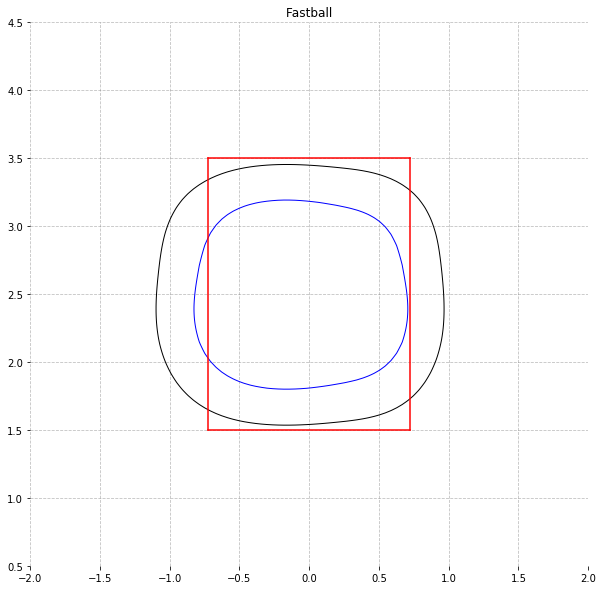

In [72]:
contour_plot(fastball)

In [78]:
def create_combined_viz(data, title):
    pitch_data = data[['pitch_name', 'plate_x', 'plate_z', 'description', 'stand']]
    pitch_data = pitch_data[pitch_data['description'].isin(['called_strike', 'ball', 'blocked_ball'])]
    pitch_data['description'].replace('blocked_ball', 'ball', inplace = True)

    area_1_bounds = [-.725, -.241667, 2.833, 3.5]
    area_2_bounds = [-.241667, .241667, 2.833, 3.5]
    area_3_bounds = [.241667, .725, 2.833, 3.5]
    area_4_bounds = [-.725, -.241667, 2.166, 2.833]
    area_5_bounds = [-.241667, .241667, 2.166, 2.833]
    area_6_bounds = [.241667, .725, 2.166, 2.833]
    area_7_bounds = [-.725, -.241667, 1.5, 2.166]
    area_8_bounds = [-.241667, .241667, 1.5, 2.166]
    area_9_bounds = [.241667, .725, 1.5, 2.166]

    zones = [area_1_bounds, area_2_bounds, area_3_bounds, area_4_bounds, area_5_bounds, area_6_bounds, area_7_bounds, area_8_bounds, area_9_bounds]

    outside_rectangles = [[(-.9666,2.5), .24166, 1.333, (-.725, 3.5), .725, .333], [(.9666,2.5), -.24166, 1.333, (.725, 3.5), -.725, .333], [(-.9666,2.5), .24166, -1.333, (-.725, 1.5), .725, -.333], [(.9666,2.5), -.24166, -1.333, (.725, 1.5), -.725, -.333]]

    outside_1_bounds1 = [-.9666, -.725, 2.5, 3.833]
    outside_1_bounds2 = [-.725, 0, 3.5, 3.833]
    outside_2_bounds1 = [.725,.9666, 2.5, 3.833]
    outside_2_bounds2 = [.725, .9666, 3.5, 3.833]
    outside_3_bounds1 = [-.9666, -.725, 1.1666, 1.5]
    outside_3_bounds2 = [-.725, 0, 1.1666, 1.5]
    outside_4_bounds1 = [.725, .9666, 1.1666, 1.5]
    outside_4_bounds2 = [0, .725, 1.1666, 1.5]

    outside_zones = [(outside_1_bounds1, outside_1_bounds2), (outside_2_bounds1, outside_2_bounds2), (outside_3_bounds1, outside_3_bounds2), (outside_4_bounds1, outside_4_bounds2)]

    classifier_data = data[['description', 'plate_x', 'plate_z']]
    X = classifier_data[['plate_x', 'plate_z']]
    y = classifier_data['description']
    classifier_data['description'].replace('ball', 0, inplace = True)
    classifier_data['description'].replace('called_strike', 1, inplace = True)
    gam = LogisticGAM().fit(X, y)
    classifier_data['pred'] = gam.predict_mu(X)
    X = classifier_data['plate_x'].to_numpy()
    Y = classifier_data['plate_z'].to_numpy()
    Z = classifier_data['pred'].to_numpy()
    ngridx = 100
    ngridy = 150
    xi = np.linspace(-2, 2, ngridx)
    yi = np.linspace(.5, 4.5, ngridy)
    zi = griddata((X, Y), Z, (xi[None, :], yi[:, None]), method='linear')

    centers = []
    for zone in zones:
        zone_center = []
        zone_center.append(((zone[1] - zone[0])/2 + zone[0])-.175)
        zone_center.append((zone[3] - zone[2])/2 + zone[2]-.05)
        centers.append(zone_center)
    centers

    def grab_pitches_from_zone(data, zone_bounds):
        zone_data = data[data['plate_x'] > zone_bounds[0]]
        zone_data = zone_data[zone_data['plate_x'] < zone_bounds[1]]
        zone_data = zone_data[zone_data['plate_z'] > zone_bounds[2]]
        zone_data = zone_data[zone_data['plate_z'] < zone_bounds[3]]
        return zone_data
    def pct_correct_per_zone(data, zone_bounds):
        zone_data = grab_pitches_from_zone(data, zone_bounds)
        return (zone_data['description'].value_counts()['called_strike'] / zone_data['description'].size)*100
    def pct_correct_per_zone_outside(data, zone_bounds1, zone_bounds2):
        zone_data1 = grab_pitches_from_zone(data, zone_bounds1)
        zone_data2 = grab_pitches_from_zone(data, zone_bounds2)
        return ((zone_data1['description'].value_counts()['called_strike'] + zone_data2['description'].value_counts()['called_strike']) / (zone_data1['description'].size + zone_data2['description'].size))*100

    def inside_zone_list(data):
        inside_zone_list = []
        for zone in zones:
               inside_zone_list.append(pct_correct_per_zone(data, zone))
        return inside_zone_list
    def outside_zone_list(data):
        outside_zone_list = []
        for zone in range(len(outside_zones)):
            try:
                 outside_zone_list.append(pct_correct_per_zone_outside(data, outside_zones[zone][0], outside_zones[zone][1]))
            except:
                pass
        return  outside_zone_list

    def create_viz(data):
        cmap = plt.get_cmap('coolwarm')
        out_norm = mcolors.Normalize(vmin=0, vmax=50)
        outside_rectangles = [[(-.9666,2.5), .24166, 1.333, (-.725, 3.5), .725, .333], [(.9666,2.5), -.24166, 1.333, (.725, 3.5), -.725, .333], [(-.9666,2.5), .24166, -1.333, (-.725, 1.5), .725, -.333], [(.9666,2.5), -.24166, -1.333, (.725, 1.5), -.725, -.333]]
        cmap = plt.get_cmap('coolwarm')
        norm = mcolors.Normalize(vmin=60, vmax=100)
        rectangles = [(-.725,2.833), (-.241667,2.833), (.241667, 2.833), (-.725,2.166), (-.241667,2.166), (.241667, 2.166), (-.725,1.5), (-.241667,1.5), (.241667, 1.5)]

        fig, ax = plt.subplots(figsize =(10,10))


        plt.plot([-.725,-.725],[1.5,3.5], color="red")
        plt.plot([.725,.725],[1.5,3.5], color="red")
        plt.plot([-.725,.725],[1.5,1.5], color="red")
        plt.plot([-.725,.725],[3.5,3.5], color="red")


        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.set_xticks([])
        ax.set_yticks([])

        for i, value in enumerate(inside_zone_list(data)): #inside data here
            rect = patch.Rectangle(rectangles[i], .4833, .6666, linewidth=1, edgecolor='black', facecolor=cmap(norm(value)), alpha = .5)
            ax.add_patch(rect)
        

        ax.contour(xi, yi, zi, levels= [.5, .9], linewidths= 2, colors=['black', 'blue'])
        ax.set_axisbelow(True)
        ax.yaxis.grid(color='gray', linestyle='dashed', alpha = .5)
        ax.xaxis.grid(color='gray', linestyle='dashed', alpha = .5)

        ax.set_title(title)

        plt.show()
    return create_viz(data)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


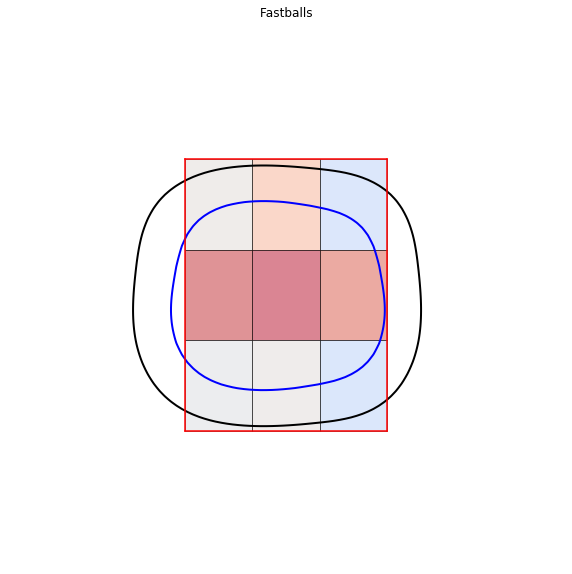

In [79]:
create_combined_viz(fastball, "Fastballs")